# Plots de Rodrigo Paz

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from numpy import loadtxt

In [12]:
fecha = "19/06/2020"
src = "/home/emiliano/data/dev/proyectos_git/arcovid19/2019-ncov-rpaz/"

datachina = np.loadtxt(f"{src}/mainlandchinacases.txt").reshape(-1,2)
dataelse  = np.loadtxt(f"{src}/elsewhere.txt").reshape(-1,2)
recovered = np.loadtxt(f"{src}/recovered.txt").reshape(-1,2)
deaths    = np.loadtxt(f"{src}/deaths.txt").reshape(-1,2)
usa       = np.loadtxt(f"{src}/usa.txt").reshape(-1,4)
sudam     = np.loadtxt(f"{src}/sudamerica.txt").reshape(-1,4)
arg       = np.loadtxt(f"{src}/arg.txt").reshape(-1,4)
italy     = np.loadtxt(f"{src}/italy.txt").reshape(-1,3)
spain     = np.loadtxt(f"{src}/spain.txt").reshape(-1,3)

In [13]:
arg.shape

(108, 4)

In [14]:
chi_x, chi_y = datachina[:,0], datachina[:,1]
els_x, els_y = dataelse[:,0], dataelse[:,1]
rec_x, rec_y = recovered[:,0],recovered[:,1]
dea_x, dea_y = deaths[:,0],deaths[:,1]    
usa_x, usa_y = usa[:,0]-usa[0,0],usa[:,1]       
sud_x, sud_y = sudam[:,0]-sudam[0,0],sudam[:,1]     
arg_x, arg_y = arg[:,0]-arg[0,0],arg[:,1]       
spa_x, spa_y = spain[:,0]-spain[0,0],spain[:,1]       
ita_x, ita_y = italy[:,0]-italy[0,0],italy[:,1]

In [15]:
t = np.array(range(1,130))

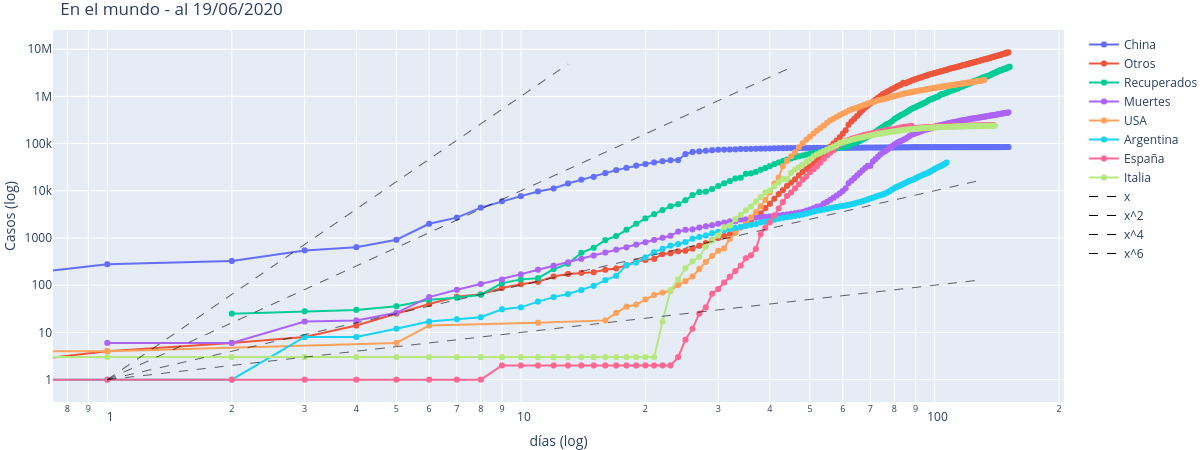

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = chi_x, y=chi_y, name="China",           line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = els_x, y=els_y, name="Otros",           line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = rec_x, y=rec_y, name="Recuperados",     line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = dea_x, y=dea_y, name="Muertes",         line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = usa_x, y=usa_y, name="USA",             line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = arg_x, y=arg_y, name="Argentina",       line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = spa_x, y=spa_y, name="España",          line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = ita_x, y=ita_y, name="Italia",          line=dict(width=2, ), mode='lines+markers'))

fig.add_trace(go.Scatter(x = t, y=t,    name="x", line=dict(width=.6, dash='dash', color='black')))
fig.add_trace(go.Scatter(x = t, y=t**2, name="x^2", line=dict(width=.6, dash='dash', color='black')))
fig.add_trace(go.Scatter(x = t[:45], y=t[:45]**4, name="x^4", line=dict(width=.6, dash='dash', color='black')))
fig.add_trace(go.Scatter(x = t[:13], y=t[:13]**6, name="x^6", line=dict(width=.6, dash='dash', color='black'), mode='lines'))

fig.update_layout(#yaxis_range=(0, 6.7), #xaxis_range=(1, 2.3), #height=750, width = 650,
                  title_text=f'En el mundo - al {fecha}', 
                  xaxis_title="días (log)", yaxis_title="Casos (log)",
                  yaxis_type="log", xaxis_type="log"
                 )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},
    
    #legend=dict(
    #    x=0.02,
    #    y=0.98,
    #    traceorder="normal",
    #    font=dict(
    #        family="sans-serif",
    #        size=10,
    #        color="black"
    #    ),
    #    #bgcolor="LightSteelBlue",
    #    bordercolor="Black",
    #    borderwidth=2
    #),
    #xaxis_rangeslider_visible=True
)

fig.show(config={'scrollZoom': True, 'displayModeBar': True,})

In [17]:
fig.write_html("graphs/totales_paises.html", include_plotlyjs="", full_html=False)

## Latinoamérica
- https://github.com/owid/covid-19-data/tree/master/public/data

In [10]:
#!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

In [18]:
latam = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=",")
ia = latam["location"]=="Mexico"
latam[ia]

iso_code      continent location        date  total_cases  new_cases  \
15509      MEX  North America   Mexico  2019-12-31          0.0        0.0   
15510      MEX  North America   Mexico  2020-01-01          0.0        0.0   
15511      MEX  North America   Mexico  2020-01-02          0.0        0.0   
15512      MEX  North America   Mexico  2020-01-03          0.0        0.0   
15513      MEX  North America   Mexico  2020-01-04          0.0        0.0   
...        ...            ...      ...         ...          ...        ...   
15683      MEX  North America   Mexico  2020-06-22     180545.0     5343.0   
15684      MEX  North America   Mexico  2020-06-23     185122.0     4577.0   
15685      MEX  North America   Mexico  2020-06-24     191410.0     6288.0   
15686      MEX  North America   Mexico  2020-06-25     196847.0     5437.0   
15687      MEX  North America   Mexico  2020-06-26     202951.0     6104.0   

       total_deaths  new_deaths  total_cases_per_million  \
15509           0.0         0.0                    0.000   
15510           0.0         0.0                    0.000   
15511           0.0         0.0                    0.000   
15512           0.0         0.0                    0.000   
15513           0.0         0.0                    0.000   
...             ...         ...                      ...   
15683       21825.0      1044.0                 1400.304   
15684       22584.0       759.0                 1435.803   
15685       23377.0       793.0                 1484.572   
15686       24342.0       965.0                 1526.742   
15687       25060.0       718.0                 1574.084   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
15509                  0.000  ...          4.321       17336.469   
15510                  0.000  ...          4.321       17336.469   
15511                  0.000  ...          4.321       17336.469   
15512                  0.000  ...          4.321       17336.469   
15513                  0.000  ...          4.321       17336.469   
...                      ...  ...            ...             ...   
15683                 41.440  ...          4.321       17336.469   
15684                 35.499  ...          4.321       17336.469   
15685                 48.770  ...          4.321       17336.469   
15686                 42.169  ...          4.321       17336.469   
15687                 47.343  ...          4.321       17336.469   

       extreme_poverty  cvd_death_rate  diabetes_prevalence  female_smokers  \
15509              2.5         152.783                13.06             6.9   
15510              2.5         152.783                13.06             6.9   
15511              2.5         152.783                13.06             6.9   
15512              2.5         152.783                13.06             6.9   
15513              2.5         152.783                13.06             6.9   
...                ...             ...                  ...             ...   
15683              2.5         152.783                13.06             6.9   
15684              2.5         152.783                13.06             6.9   
15685              2.5         152.783                13.06             6.9   
15686              2.5         152.783                13.06             6.9   
15687              2.5         152.783                13.06             6.9   

       male_smokers  handwashing_facilities hospital_beds_per_thousand  \
15509          21.4                  87.847                       1.38   
15510          21.4                  87.847                       1.38   
15511          21.4                  87.847                       1.38   
15512          21.4                  87.847                       1.38   
15513          21.4                  87.847                       1.38   
...             ...                     ...                        ...   
15683          21.4                  87.847                     

In [19]:
mx = latam[ia]["total_cases"]

# empiezan datos en 8128
# 7753       5
# 7754       0
# 7755       0
# 7756       0
# 7757       0
# 7758       0
# 7759       0
# 7760       7
# 7761       0
# 7762       0
# 7763      11


In [20]:
#mx.loc[8987:]
ini = mx[mx==5].index[0]
mx.loc[ini+1:ini+6] = 5
mx.loc[ini+8:ini+9] = 7

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
mx.loc[ini:ini+20]

15571      5.0
15572      5.0
15573      5.0
15574      5.0
15575      5.0
15576      5.0
15577      5.0
15578      7.0
15579      7.0
15580      7.0
15581     11.0
15582     16.0
15583     26.0
15584     41.0
15585     53.0
15586     82.0
15587     93.0
15588    118.0
15589    164.0
15590    203.0
15591    251.0
Name: total_cases, dtype: float64

In [17]:
#mx.loc[7751:]

In [22]:
mx = mx.loc[ini:]

## Latinoamérica

In [23]:
#arg = np.loadtxt(f"{src}txt/Argentina.txt")
bol = np.loadtxt(f"{src}txt/Bolivia.txt")
bra = np.loadtxt(f"{src}txt/Brazil.txt")
chi = np.loadtxt(f"{src}txt/Chile.txt")
col = np.loadtxt(f"{src}txt/Colombia.txt")
ecu = np.loadtxt(f"{src}txt/Ecuador.txt")
par = np.loadtxt(f"{src}txt/Paraguay.txt")
per = np.loadtxt(f"{src}txt/Peru.txt")
uru = np.loadtxt(f"{src}txt/Uruguay.txt")
ven = np.loadtxt(f"{src}txt/Venezuela.txt")

In [24]:
#arg_x, arg_y = arg[:,0], arg[:,1]
bol_x, bol_y = bol[:,0], bol[:,1]
bra_x, bra_y = bra[:,0]-57, bra[:,1]
chi_x, chi_y = chi[:,0], chi[:,1]
col_x, col_y = col[:,0], col[:,1]
ecu_x, ecu_y = ecu[:,0]-60, ecu[:,1]
par_x, par_y = par[:,0], par[:,1]
per_x, per_y = per[:,0], per[:,1]
uru_x, uru_y = uru[:,0], uru[:,1]
ven_x, ven_y = ven[:,0], ven[:,1]

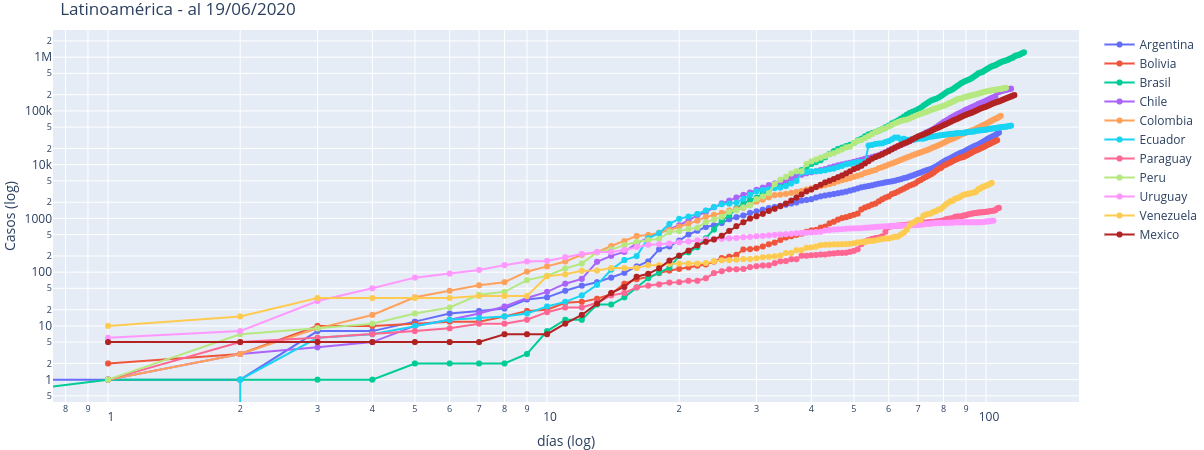

In [25]:
fig = go.Figure()


fig.add_trace(go.Scatter(x = arg_x, y=arg_y, name="Argentina", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = bol_x, y=bol_y, name="Bolivia", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = bra_x, y=bra_y, name="Brasil", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = chi_x, y=chi_y, name="Chile", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = col_x, y=col_y, name="Colombia", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = ecu_x, y=ecu_y, name="Ecuador", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = par_x, y=par_y, name="Paraguay", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = per_x, y=per_y, name="Peru", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = uru_x, y=uru_y, name="Uruguay", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = ven_x, y=ven_y, name="Venezuela", line=dict(width=2, ), mode='lines+markers'))
fig.add_trace(go.Scatter(x = np.array(range(1,len(mx))), y=mx, name="Mexico", line=dict(width=2,color='firebrick' ), mode='lines+markers'))


fig.update_layout(#xaxis_range=(1, 1), 
                  title_text=f'Latinoamérica - al {fecha}', #height=750, width = 650,
                  xaxis_title="días (log)", yaxis_title="Casos (log)",
                  yaxis_type="log", xaxis_type="log"
                 )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},
    #legend=dict(
    #    x=0.02,
    #    y=0.99,
    #    traceorder="normal",
    #    font=dict(
    #        family="sans-serif",
    #        size=10,
    #        color="black"
    #    ),
    #    #bgcolor="LightSteelBlue",
    #    bordercolor="Black",
    #    borderwidth=0
    #),
    #xaxis_rangeslider_visible=True
)

fig.show(config={'scrollZoom': True, 'displayModeBar': True,})

In [26]:
fig.write_html("graphs/latam.html", include_plotlyjs="", full_html=False)